In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from dmba import regressionSummary
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy import log
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from dateutil.parser import parse
import pmdarima as pm
%matplotlib inline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

no display found. Using non-interactive Agg backend


In [2]:
df=pd.read_csv("v_hungpq_test_mpg_material_quantity_purchased.csv")
# predict thu mua 

In [3]:
df=df[df.columns[1:6]]
df.head()

,std_factory,std_type,std_size,std_quantity_kg,std_active_date
0,Hậu Giang,Sú Vỏ,100/200,0.00,1990-01-01
1,Hậu Giang,Sú Vỏ,13/15.1,321.62,1990-01-01
2,Hậu Giang,Sú Vỏ,13/15.2,837.90,1990-01-01
3,Hậu Giang,Sú Vỏ,13/15.3,1578.76,1990-01-01
4,Hậu Giang,Sú Vỏ,16/20.1,247.37,1990-01-01


In [4]:
df=df[df['std_active_date']>'1990-01-01']

In [5]:
factory=df['std_factory'].unique()
factory

array(['Hậu Giang', 'Cà Mau'], dtype=object)

In [6]:
types=df['std_type'].unique()
types

array(['Sú Vỏ', 'Sú Nguyên Con', 'Thẻ Chân Trắng'], dtype=object)

In [7]:
sizes=df['std_size'].unique()
sizes

array(['13/15.1', '13/15.2', '13/15.3', '16/20.1', '16/20.2', '16/20.3',
       '21/25.1', '21/25.2', '21/25.3', '2/4', '26/30.1', '26/30.2',
       '26/30.3', '31/40.1', '31/40.2', '31/40.3', '41/50.1', '41/50.2',
       '4/6', '51/60', '61/70', '6/8', '71/90', '8/12.1', '8/12.2',
       '8/12.3', '8/12.4', '100/200', '91/110', '10/12', '13/15', '20/23',
       '25/28', '28/30', '30/35', '35/40', '40/45', '45/50', '50/60',
       '60/70', '7/8', '140', '22', '23', '24', '25', '28', '29', '30',
       '31', '32', '33', '35', '37', '38', '41', '42', '47', '48', '49',
       '50', '58', '59', '60', '61', '62', '64', '67', '80', '81', '84',
       '85', '91', '92', '97', '98', '18', '19', '26', '27', '36', '39',
       '40', '43', '44', '45', '46', '65', '66', '69', '70', '71', '76',
       'Vụn', '106', '53', '54', '56', '57', '63', '72', '73', '74', '78',
       '79', '87', '17', '34', '68', '96', '51', '52', '55', '75', '77',
       '18/20', '23/25', '9/10', '100', '108', '110', '126',

In [8]:
df_filter=df[(df['std_factory']==factory[0])&(df['std_type']==types[0])&(df['std_size']==sizes[0])]

In [9]:
df_filter.head()

,std_factory,std_type,std_size,std_quantity_kg,std_active_date
29,Hậu Giang,Sú Vỏ,13/15.1,198.37,2019-10-28
56,Hậu Giang,Sú Vỏ,13/15.1,330.18,2019-10-29
83,Hậu Giang,Sú Vỏ,13/15.1,161.93,2019-10-30
111,Hậu Giang,Sú Vỏ,13/15.1,284.52,2019-10-31
138,Hậu Giang,Sú Vỏ,13/15.1,72.81,2019-11-01


In [10]:
df_filter.shape

(229, 5)

In [11]:
df1=df_filter[['std_quantity_kg','std_active_date']]

In [12]:
df1.index=pd.to_datetime(df1['std_active_date'])

In [13]:
df1=df1[df1.columns[0:1]]

In [19]:
tsnew=df1.asfreq('d').index
tsnew

DatetimeIndex(['2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31',
               '2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04',
               '2019-11-05', '2019-11-06',
               ...
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30',
               '2020-07-01', '2020-07-02'],
              dtype='datetime64[ns]', name='std_active_date', length=249, freq='D')

In [20]:
len(tsnew),len(df1),df1.index

(249,
 229,
 DatetimeIndex(['2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31',
                '2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04',
                '2019-11-05', '2019-11-06',
                ...
                '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
                '2020-06-26', '2020-06-27', '2020-06-29', '2020-06-30',
                '2020-07-01', '2020-07-02'],
               dtype='datetime64[ns]', name='std_active_date', length=229, freq=None))

In [17]:
ts=df1.index
mask = tsnew.isin(ts)
missing=tsnew[~mask]

In [18]:
missing

DatetimeIndex(['2019-11-21', '2019-12-19', '2020-01-01', '2020-01-21',
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-03-25', '2020-04-02',
               '2020-04-05', '2020-04-15', '2020-04-28', '2020-04-30',
               '2020-05-01', '2020-05-29', '2020-06-10', '2020-06-28'],
              dtype='datetime64[ns]', name='std_active_date', freq=None)

In [406]:
def filling(df):
    tsnew=df.asfreq('d').index
    ts=df.index
    mask = tsnew.isin(ts)
    missing=tsnew[~mask]
    df0=pd.DataFrame([np.nan]*len(missing),index=missing,columns=df.columns)
    df1=pd.concat([df,df0],axis=0)
    df2=df1.fillna(0)
    df3 = df2.sort_index()
    return df3

In [407]:
df2=filling(df1)

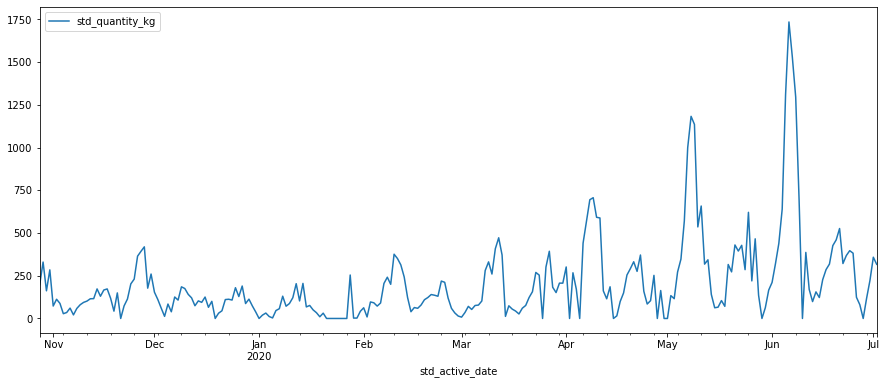

In [408]:
df2.plot(figsize=(15,6))

Text(0.5, 1.0, 'Hậu Giang, Sú Vỏ, 13/15.1')

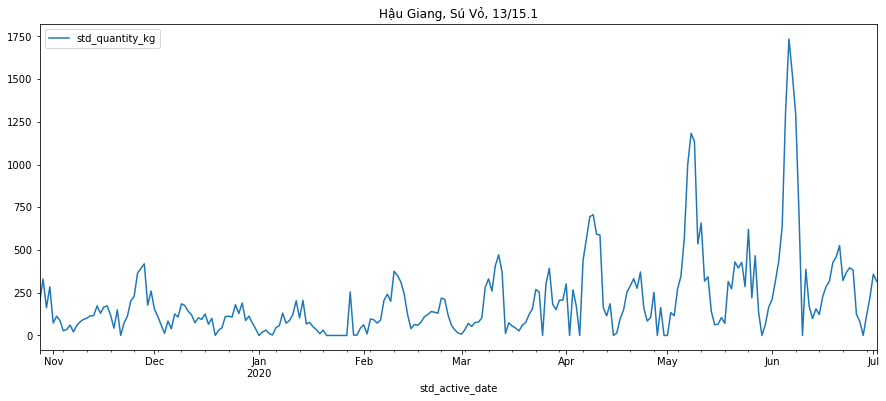

In [411]:
# STEP 1: VISUALIZE 
x=df2
ax=x.plot(figsize=(15,6))
ax.set_title(factory[0]+", "+types[0]+", "+sizes[0])

In [414]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def pearson(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.corrcoef(y_true,y_pred)[0,1]

In [412]:
def predict_ES(df):
    # train and test
    #df.index = pd.DatetimeIndex(df.index).to_period('D')
    n=np.int(0.6*len(df))
    train=df.iloc[:n]
    test=df.iloc[n:]
    ntest=len(df)-n
    # model 
    #model=ES(train,trend='add',damped=True,seasonal='add',seasonal_periods=1).fit()
    model=ES(train,trend='add',damped=True,seasonal='add',seasonal_periods=30).fit()
    fc=model.forecast(ntest)
    fc.index=test.index
    #print('RMSE:', np.sqrt(mean_squared_error(test,fc)))
    #df.plot(figsize=(15,6))
    #fc.plot()
    #plt.show()
    return fc

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


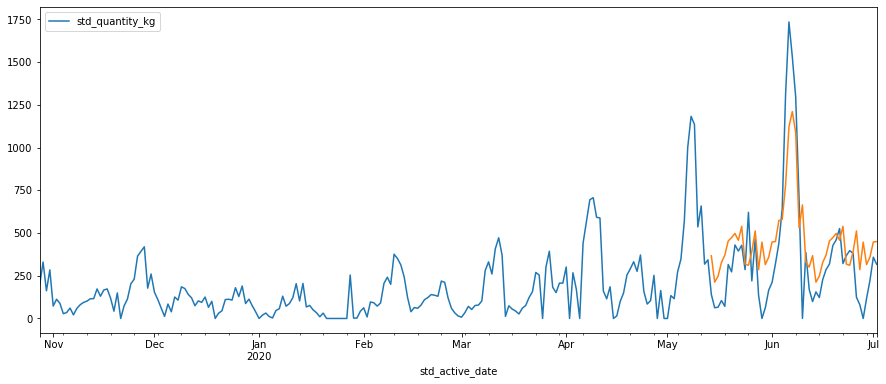

MAPE 69.26388818038356
PEARSON 0.8535410581167024


In [413]:
x=df2[df2.columns[0:1]]

n=np.int(0.8*len(x))
train=x.iloc[:n]
test=x.iloc[n:]
ntest=len(x)-n

model=ES(train,trend='add',damped=True,seasonal='add',seasonal_periods=30).fit()
fc=model.forecast(ntest)
fc.index=test.index
#fc=predict_ES(x)
x.plot(figsize=(15,6))
fc.plot()
plt.show()

print('MAPE',mean_absolute_percentage_error( fc.values,test.values) )
print('PEARSON',pearson(fc.values,test.values.reshape(ntest)) )

In [419]:
x=df2[df2.columns[0:1]]+1e-6
n=np.int(0.8*len(x))
train=x.iloc[:n]
test=x.iloc[n:]
ntest=len(x)-n

In [420]:
list_optional=['add', 'mul',None]
for t in list_optional:
    for s in list_optional:
        model=ES(train,trend=t,damped=True,seasonal=s,seasonal_periods=30).fit()
        #model=ES(train,trend=t,seasonal=s,seasonal_periods=30).fit()
        fc=model.forecast(ntest)
        fc.index=test.index
        print(t,", ",s,", ",'MAPE:', mean_absolute_percentage_error(fc.values,test.values))
        #print(t,", ",s,", ",'PEARSON:',pearson(fc.values,test.values.reshape(50)) )

#model=ES(train,trend='add',damped=True,seasonal='add',seasonal_periods=30).fit()
#fc=model.forecast(ntest)
#fc.index=test.index
#mean_absolute_percentage_error(fc.values,test.values)

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


add ,  add ,  MAPE: 69.26388804285459


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


add ,  mul ,  MAPE: 117.041611948871
add ,  None ,  MAPE: 73.26560794912439


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:913: RuntimeWarning: invalid value encountered in power
  (alphac * trended(lvls[i - 1], dampen(b[i - 1], phi)))
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:916: RuntimeWarning: invalid value encountered in power
  (betac * dampen(b[i - 1], phi))
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:918: RuntimeWarning: invalid value encountered in power
  (gamma * trended(lvls[i - 1], dampen(b[i - 1], phi))) + \
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:924: RuntimeWar

mul ,  add ,  MAPE: 63.195585143369534


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:895: RuntimeWarning: overflow encountered in multiply
  (alphac * trended(lvls[i - 1], dampen(b[i - 1], phi)))
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:899: RuntimeWarning: overflow encountered in multiply
  s[i + m - 1] = y_gamma[i - 1] / trended(lvls[i - 1], dampen(b[i - 1], phi)) + \
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:897: RuntimeWarning: invalid value encountered in true_divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + \
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:907: RuntimeWarning: overflow encountered in multiply
  trend = trended(lvls, b)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWa

mul ,  mul ,  MAPE: nan
mul ,  None ,  MAPE: nan


C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:932: RuntimeWarning: overflow encountered in multiply
  (alphac * trended(lvls[i - 1], dampen(b[i - 1], phi)))
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:934: RuntimeWarning: invalid value encountered in true_divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + \
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:942: RuntimeWarning: overflow encountered in multiply
  trend = trended(lvls, b)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: Can only dampen the trend component

Text(0.5, 1.0, 'Hậu Giang, Sú Vỏ, 13/15.1')

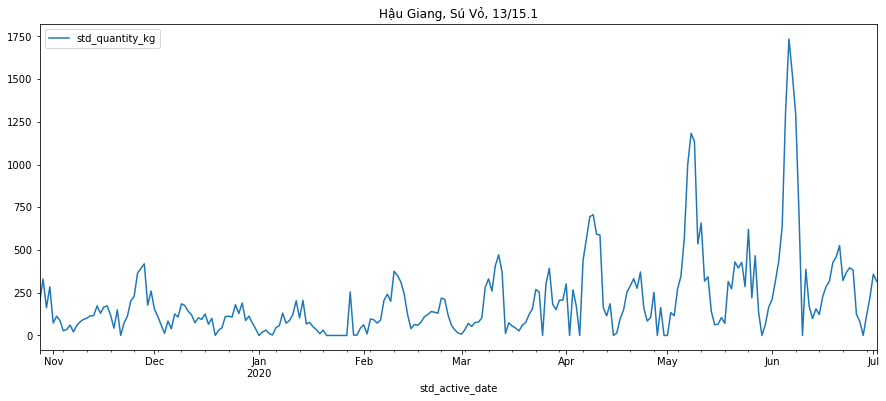

In [421]:
# STEP 1: VISUALIZE 
x=df2
ax=x.plot(figsize=(15,6))
ax.set_title(factory[0]+", "+types[0]+", "+sizes[0])

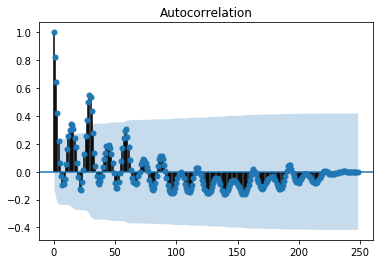

In [423]:
# Plot autocorrelation
x=df2
plot_acf(x, lags=np.arange(len(x)))
#plot_acf(df1, lags=60)
plt.show()

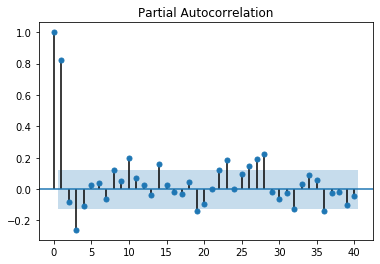

In [424]:
x=df2
plot_pacf(x,lags=40)
plt.show()

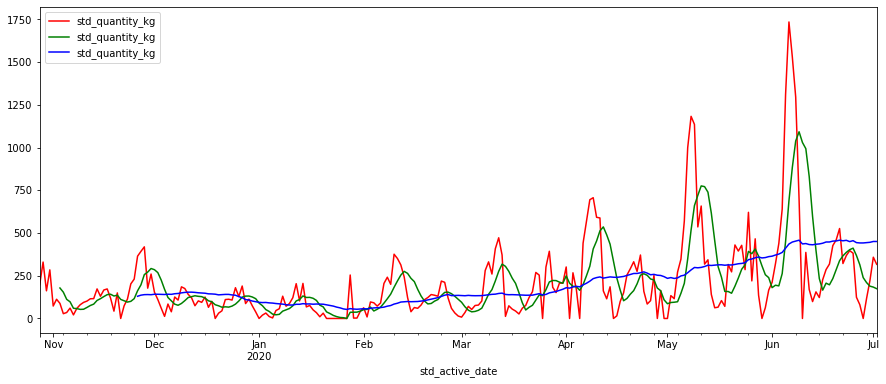

In [425]:
x=df2
weekly_MA=x.rolling(7).mean()
monthly_MA=x.rolling(30).mean()
ax=x.plot(color='red',figsize=(15,6))
weekly_MA.plot(ax=ax,color='green')
monthly_MA.plot(ax=ax,color='blue')
plt.show()

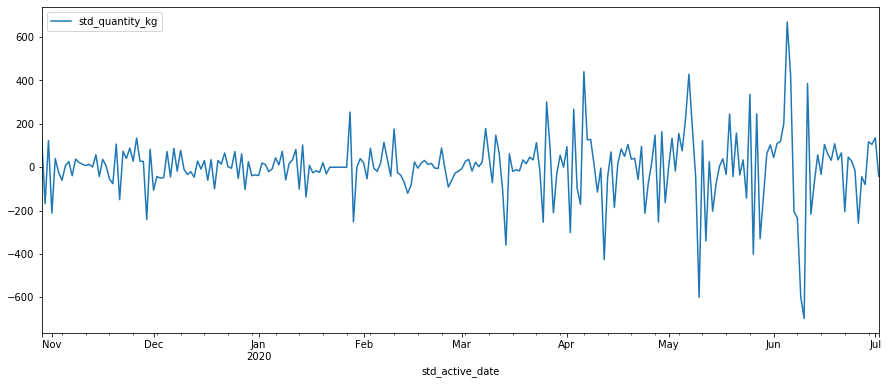

In [426]:
# STATIONARY
x=df2
first_diff = x.diff(1)[1:] #x't = xt - xt-1
first_diff.plot(figsize=(15,6))

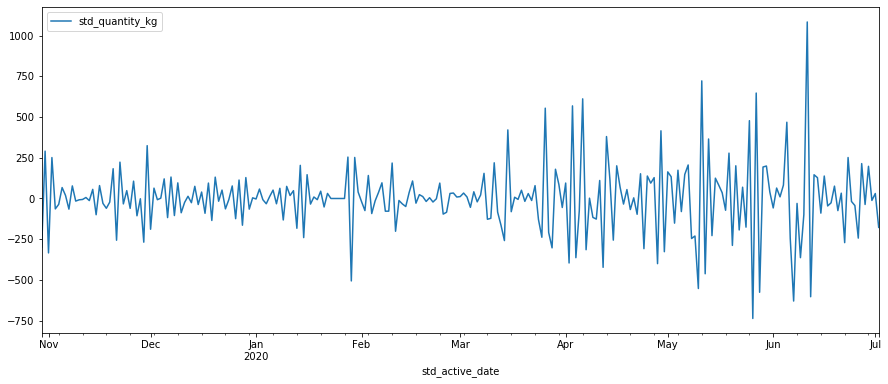

In [427]:
x=df2
second_diff = x.diff(1).diff(1)[2:] #x"t = x't - x't-1 = (xt - xt-1) - (xt-1 - xt-2) = xt - 2xt-1+xt-2
second_diff.plot(figsize=(15,6))

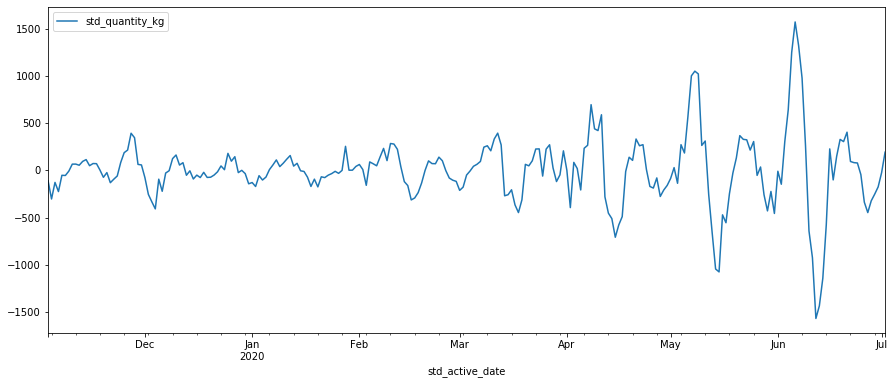

In [436]:
# Seasonal differencing, x't = xt - xt-m, 
m=6
x=df2
seasonal_diff = x.diff(m)[m:]
seasonal_diff.plot(figsize=(15,6))

In [40]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [437]:
adf_test(x)

Results of Dickey-Fuller Test:
Test Statistic                  -4.931478
p-value                          0.000030
#Lags Used                       0.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


C:\Users\tvlon\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


In [438]:
adf_test(first_diff)

Results of Dickey-Fuller Test:
Test Statistic                -7.654728e+00
p-value                        1.751259e-11
#Lags Used                     1.200000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


In [439]:
adf_test(second_diff)

Results of Dickey-Fuller Test:
Test Statistic                -9.109602e+00
p-value                        3.427934e-15
#Lags Used                     1.600000e+01
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64


In [440]:
adf_test(seasonal_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -4.842988
p-value                          0.000045
#Lags Used                      15.000000
Number of Observations Used    227.000000
Critical Value (1%)             -3.459490
Critical Value (5%)             -2.874358
Critical Value (10%)            -2.573602
dtype: float64


In [270]:
# Time series decomposition
#decompose_model = seasonal_decompose(df1,freq=12, model='additive')
decompose_model = seasonal_decompose(df5,period=30, model='additive')
decompose_model.plot()
plt.show()

ValueError: This function does not handle missing values

In [243]:
#decompose_model = seasonal_decompose(df5,period=30, model='multiplicative')
#decompose_model.plot()
#plt.show()

# PREDICT
## Exponential smoothing

In [448]:
def predict_ts(df):
    # train and test
    #df.index = pd.DatetimeIndex(df.index).to_period('D')
    n=np.int(0.8*len(df))
    train=df.iloc[:n]
    test=df.iloc[n:]
    ntest=len(df)-n
    # model 
    #model=ES(train,trend='add',damped=True,seasonal='add',seasonal_periods=1).fit()
    model=ES(train,trend='add',damped=True,seasonal='add',seasonal_periods=30).fit()
    fc=model.forecast(ntest)
    fc.index=test.index
    #print('RMSE:', np.sqrt(mean_squared_error(test,fc)))
    #df.plot(figsize=(15,6))
    #fc.plot()
    #plt.show()
    return fc

In [98]:
#df1.head()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


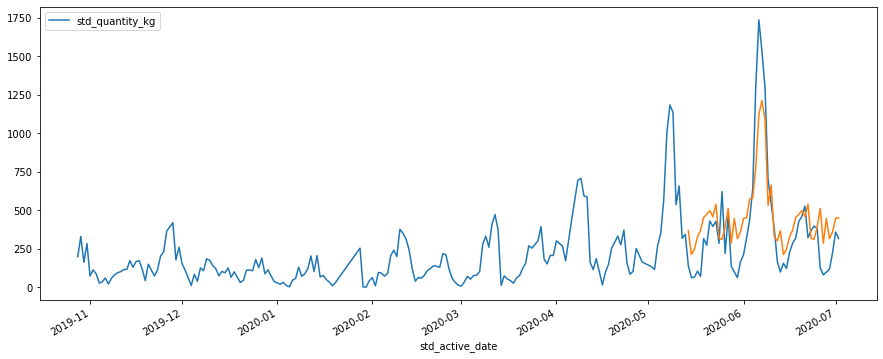

In [467]:
x=df2
fc=predict_ts(x)
df1.plot(figsize=(15,6))
fc.plot()
plt.show()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


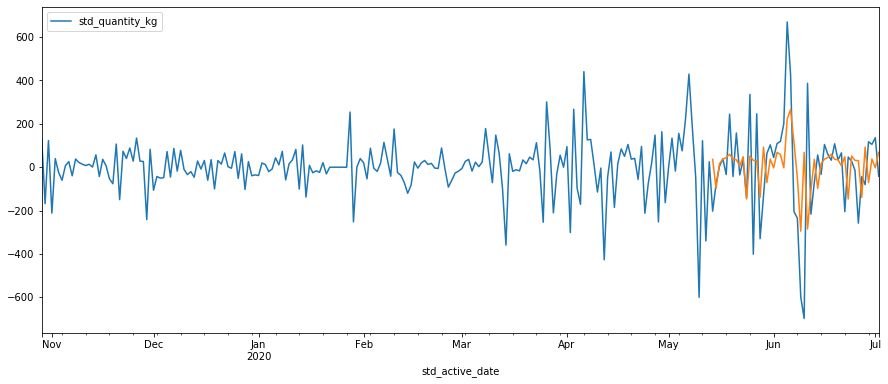

In [450]:
x=first_diff
#x.index = pd.DatetimeIndex(x.index).to_period('D')
fc=predict_ts(x)
x.plot(figsize=(15,6))
fc.plot()
plt.show()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


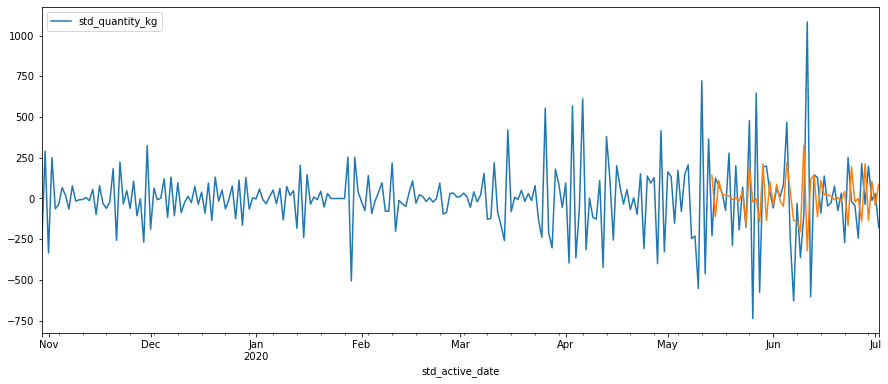

In [452]:
x=second_diff
fc=predict_ts(x)
x.plot(figsize=(15,6))
fc.plot()
plt.show()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


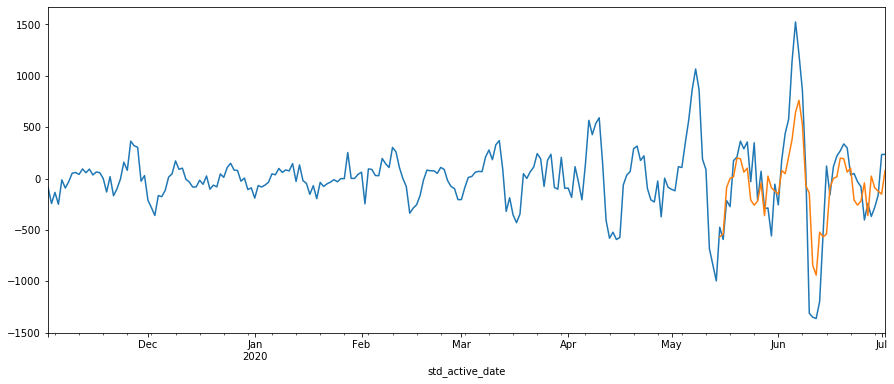

In [492]:
# Seasonal differencing, x't = xt - xt-m, 
m=5
x=df2['std_quantity_kg']
seasonal_diff = x.diff(m)[m:]
#seasonal_diff.plot(figsize=(15,6))

x=seasonal_diff
fc=predict_ts(x)
x.plot(figsize=(15,6))
fc.plot()
plt.show()

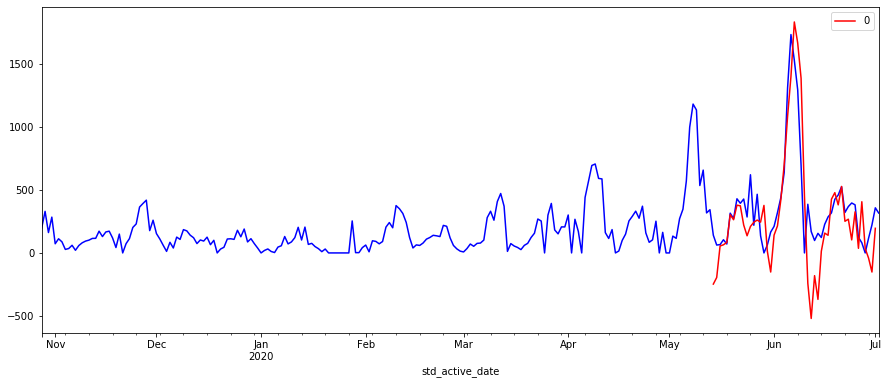

In [522]:
#convert
x=df2['std_quantity_kg']

n=np.int(0.8*len(x))
ntest=len(x)-n
train=x.iloc[:n]
test=x.iloc[n:]         

y=pd.DataFrame([fc.iloc[i-n]+x.iloc[i-m] for i in range(n,len(x)-1)],index=test.index[:ntest-1])
ax1=x.plot(figsize=(15,6),color='blue')
y.plot(ax=ax1,color='red')
plt.show()

In [511]:
#y=[fc.iloc[i-n]+x.iloc[i-m] for i in range(n,len(x)-1)]

In [505]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
 
# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob
 
# define a dataset with a linear trend
data = [i+1 for i in range(20)]
print(data)
# difference the dataset
m=2
diff = difference(data,interval=m)
print(diff)
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
print(inverted)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


## ARIMA

In [468]:
x=df2
x["station"]=x[x.columns[0]]-x[x.columns[0]].rolling(15).mean()

In [469]:
train_st=x[x.columns[1:2]].iloc[:-30]
test_st=x[x.columns[1:2]].iloc[-30:]
train_st=train_st.dropna()

In [470]:
model=SARIMAX(train_st,
              order=(0,1,2),
              seasonal_order=(0,1,2,12),
              enforce_invertibility=False,enforce_stationary=False).fit()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


LinAlgError: SVD did not converge

In [471]:
fc=model.forecast(30)

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:932: RuntimeWarning: overflow encountered in multiply
  (alphac * trended(lvls[i - 1], dampen(b[i - 1], phi)))
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:934: RuntimeWarning: invalid value encountered in true_divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + \
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:942: RuntimeWarning: overflow encountered in multiply
  trend = trended(lvls, b)


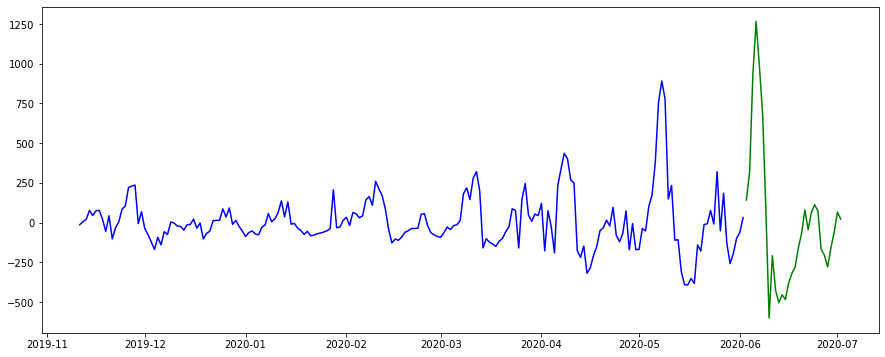

In [472]:
fig,ax=plt.subplots(figsize=(15,6))
ax.plot(train_st.index,train_st.values,color='blue')
ax.plot(test_st.index,test_st.values,color='green')
ax.plot(test_st.index,fc.values,color='red')
#ax.fill_between(test.index,lower.values,upper.values,alpha=0.5)

In [473]:
pred=fc+x[x.columns[0]].rolling(15).mean()[-30:].values

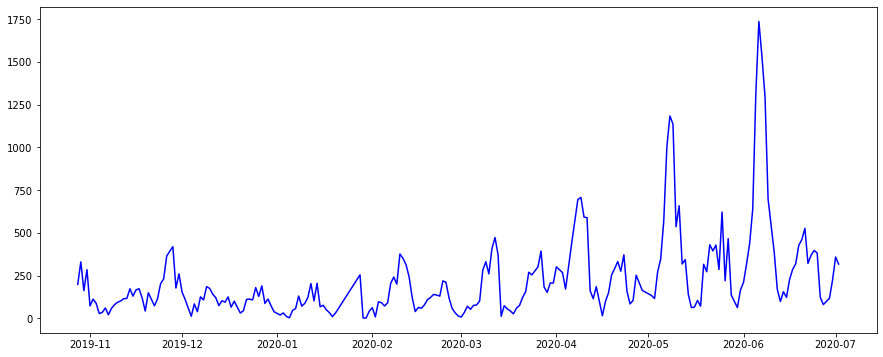

In [474]:
fig1,ax1=plt.subplots(figsize=(15,6))
ax1.plot(df1.index,df1['std_quantity_kg'].values,color='blue')
#ax.plot(test_st.index,test_st.values,color='green')
ax1.plot(test_st.index,pred.values,color='red')
#ax.fill_between(test.index,lower.values,uppe